# Actividad evaluable del módulo 2: Clasificación de vinos

En este módulo, volveremos a tratar los problemas de clasificación binarios, pero esta vez con un conjunto de datos del mundo real.

Para la actividad, hemos elegido un conjunto de datos sobre la calidad del vino (https://archive.ics.uci.edu/ml/datasets/wine+quality). Este conjunto contiene información sobre más de 6000 botellas de vino tinto y blanco. Su tarea será desarrollar un clasificador de una sola neurona capaz de distinguir entre ambas variedades con una precisión razonable. Más abajo, hemos incluido código que le servirá de ayuda para subir los archivos y preparar el conjunto (se trata de una buena oportunidad para aprender Python en la práctica). Además, hemos incluido las llamadas finales a la función que queremos que ejecute para entrenar y evaluar su clasificador. No dude en reutilizar código que ya haya visto o escrito en cuadernos anteriores.

In [2]:
#Descargar los archivos .csv del repositorio de datos
!rm -f winequality-red.csv winequality-white.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2023-10-16 18:09:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [  <=>               ]  82.23K   180KB/s    in 0.5s    

2023-10-16 18:09:42 (180 KB/s) - ‘winequality-red.csv’ saved [84199]

--2023-10-16 18:09:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [   <=>              ] 258.23K   421KB/s    in 0.6s    

2023-10-16

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
direccion = "/content/drive/MyDrive/MIT/Dataset"
os.chdir(direccion)

In [5]:
import math, random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
#Estos son los paquetes necesarios para completar esta actividad
import pandas as pd
import numpy as np

#Utilice Pandas para leer el archivo cvs en un marco de datos
#Fíjese en que, en este .cvs, el delimitador es un punto y coma, ";", en vez de una coma
df_red = pd.read_csv('winequality-red.csv',delimiter=";")

#Como estamos realizando una tarea de clasificación, les asignaremos a todos los vinos tintos la etiqueta 1
df_red["color"] = 1

#El método .head() es muy útil para previsualizar los datos
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
df_white = pd.read_csv('winequality-white.csv',delimiter=";")
df_white["color"] = 0  #Asignaremos a todos los vinos blancos la etiqueta 0
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [8]:
#Ahora, combinamos los dos marcos de datos
df = pd.concat([df_red, df_white])

#Y mezclamos los datos de los vinos blancos y los tintos
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6,1
1,6.1,0.17,0.29,1.1,0.041,32.0,92.0,0.99036,3.26,0.57,11.2,6,0
2,7.9,0.11,0.49,4.5,0.048,27.0,133.0,0.99460,3.24,0.42,10.6,6,0
3,6.2,0.24,0.29,13.3,0.039,49.0,130.0,0.99520,3.33,0.46,11.0,8,0
4,9.0,0.22,0.49,10.4,0.048,52.0,195.0,0.99870,3.31,0.44,10.2,6,0


In [9]:
#Elegimos tres atributos en los que basar la predicción
input_columns = ["citric acid", "residual sugar", "total sulfur dioxide"]
output_columns = ["color"]

X = df[input_columns]


In [10]:
#aplicamos un escalado para tener la misma escala en las dimensiones
#de 0 a 1
escalador =  StandardScaler()  #MinMaxScaler()
X = escalador.fit_transform(X)

In [11]:
X

array([[ 1.93636509, -0.72375839, -1.57021396],
       [-0.19705367, -0.91293585, -0.42012779],
       [ 1.17934553, -0.19826542,  0.30531117],
       ...,
       [-1.50463292, -0.68171895, -1.14556676],
       [ 1.38580541, -0.5135612 , -1.07479222],
       [-0.33469359,  1.25209518,  1.03075014]])

In [12]:
#Extraemos los atributos relevantes en los arrays x e y
#X = df[input_columns].to_numpy()
Y = df[output_columns].to_numpy()
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
in_features = X.shape[1]

Shape of X: (6497, 3)
Shape of Y: (6497, 1)


In [13]:
#def train_model_NLL_loss(model_function, w,w_0,input_data, output_data,learning_rate,num_epochs):
def train_model_NLL_loss(model_function,input_data, output_data,learning_rate,num_epochs):
  non_zero_tolerance = 1e-8
  do_print = False
  w = model.w
  w_0 = model.w_0
  print("W: ",w)
  print("W_0: ",w_0)
  for epoch in range(num_epochs):
    total_loss = 0
    for x, y in zip(input_data, output_data):
      ##y_predicted = model_function(w,w_0,x)
      model.w = w
      model.w_0 = w_0
      y_predicted = model_function.forward(x)
      nll_loss = -(y*math.log(y_predicted + non_zero_tolerance)+ (1-y)*math.log(1-y_predicted+non_zero_tolerance))

      total_loss += nll_loss
      if do_print: print("x:",x,"y:",y,"nll_loss:",nll_loss)
      if do_print: print(" old weights:",w,w_0)

      w_0 -= learning_rate * (y_predicted - y)

      for j,x_j in enumerate(x):
        w[j] -= learning_rate * (y_predicted-y)* x_j

      if do_print: print(" new weights: ", w, w_0)
    report_every = max(1,num_epochs //10)
    if epoch % report_every == 0:
      print("epoch", epoch, "has total loss", total_loss)
  return w, w_0

In [14]:
#Inserte aquí su código
#Modelo de clasificación = ...
class myModel():
  def __init__(self,w,w_0):
    self.w = w
    self.w_0 = w_0
  def forward(self,x):
    z=0
    for feature, weight in zip(x,self.w):
      z += feature * weight
    z+=self.w_0
    a = sigmoid(z)
    return a

def sigmoid(z):
    non_zero_tolerance = 1e-8
    #print(z)
    return 1 / (1+ math.exp(-z)+non_zero_tolerance)

#Utilizaremos esta función para evaluar el rendimiento del clasificador entrenado
#Pista: el modelo que defina más arriba debe tener una función .forward para ser compatible
#Pista: la función de evaluación es idéntica a la de los cuadernos anteriores
def evaluate_classification_accuracy(model, input_data, labels):

    #Contar el número de muestras clasificadas correctamente dado un número de pesos

    correct = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i]
        y = labels[i]

        y_predicted = model.forward(x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
    accuracy = correct / num_samples
    print("Our model predicted", correct, "out of", num_samples,
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

In [15]:
# Esta función nos permitirá mostrar el conjunto de datos en un gráfico en 3D,
# pero no necesita entender este paso todavía
def plot_3d_dataset(x, y):
    x_np_3d = np.array(x)
    x_np_3d.reshape(len(x),3)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(x_np_3d[...,0], x_np_3d[...,1],x_np_3d[...,2], color = colors)
    return ax

# Esta función nos permitirá reproducir en un gráfico la frontera de decisión de 3D
# para un conjunto de pesos dado
def plot_3d_decision_boundary(ax, w, w_0):
  x = np.linspace(-1,4,10)
  y = np.linspace(-1,6,10)
  X,Y = np.meshgrid(x,y)
  Z = (-X*w[0] - Y*w[1] - w_0)/w[2]
  surf = ax.plot_surface(X, Y, Z)
  ax.set_zlim(-10,5)
  return


In [17]:
#Entrenamiento del modelo...
w_0 = 0.1
w = [0.1,0.1,0.1]
learning_rate = 0.001
epochs = 101 #200
#...
model = myModel(w,w_0)
#train_model_NLL_loss(model_function,input_data, output_data,learning_rate,num_epochs):
w, w_0 = train_model_NLL_loss(model,X,Y,learning_rate,epochs)
#w, w_0 = train_model_NLL_loss(model,w,w_0,input_data,labels,learning_rate,epochs)

print("\Final weights")
print(w,w_0)
#def evaluate_classification_accuracy(model, input_data, labels):
evaluate_classification_accuracy(model,X, Y)


W:  [0.1, 0.1, 0.1]
W_0:  0.1
epoch 0 has total loss [4610.23702553]
epoch 1 has total loss [3925.76989374]
epoch 2 has total loss [3468.7938174]
epoch 3 has total loss [3148.42239658]
epoch 4 has total loss [2912.37994134]
epoch 5 has total loss [2731.13191692]
epoch 6 has total loss [2587.32396606]
epoch 7 has total loss [2470.22741725]
epoch 8 has total loss [2372.88212269]
epoch 9 has total loss [2290.57846967]
\Final weights
[array([-0.15451933]), array([-0.29289259]), array([-0.983353])] [-0.89336749]
Our model predicted 5988 out of 6497 correctly for 92.16561489918423 % accuracy


0.9216561489918423

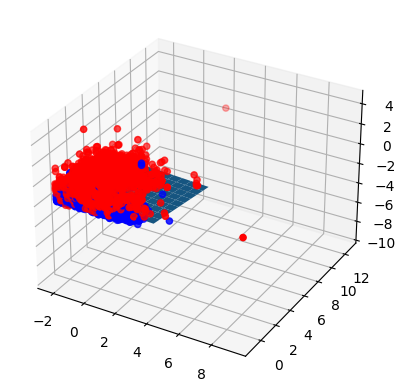

In [ ]:
ax = plot_3d_dataset(X, Y)
plot_3d_decision_boundary(ax, w, w_0)